# SmartHVAC

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # type: ignore
from IPython.display import display

## Extracting Data

Data Source Reference
- The data used in this notebook is from:
  https://figshare.com/articles/dataset/Scientific_Journal_Data_Empirical_HVAC_Operation/20520438

### Room Temperature setpoint data

Select one data set from below list 
>Stair_101, Room_102, Room_103, Room_104, Room_105, Room_106, Stair_201, Room_202, Room_203, Room_204, Room_205, Room_206

In [46]:
target_room = 'Room_102'  # Change this to your desired room
# Let user choose a room (e.g., 'Room_102', 'Stair_101', 'Room_205', etc.)


In [47]:
# Load the CSV file
df = pd.read_csv('Dataset/20520438/Building_Base_Cooling.csv', skiprows=[1])  # Skip the unit row

# Extract ALL data for the target room (Temperature, Humidity, VAV, Energy, Airflow)
# all the data available for the room
room_data = df.filter(regex=f'TIMESTAMP|T_{target_room}|RH_{target_room}|T_VAV_{target_room[-3:]}|RH_VAV_{target_room[-3:]}|WH.*{target_room[-3:]}|AF_VAV_{target_room[-3:]}') 

# Display extracted columns and first 5 rows
print(f"\nColumns extracted for {target_room}:")
print(room_data.columns.tolist())

print(f"\nFirst 5 rows for {target_room}:")
display(room_data.head())




Columns extracted for Room_102:
['TIMESTAMP', 'T_Room_102', 'RH_Room_102', 'T_VAV_102', 'RH_VAV_102', 'WH_RTU_VAV102', 'AF_VAV_102']

First 5 rows for Room_102:


,TIMESTAMP,T_Room_102,RH_Room_102,T_VAV_102,RH_VAV_102,WH_RTU_VAV102,AF_VAV_102
0,7/8/2021 0:00,20.855556,51.66,19.738889,55.02,629.3916,0.054012
1,7/8/2021 0:01,20.888889,51.33,19.922222,53.95,520.6848,0.054182
2,7/8/2021 0:02,20.883333,51.05,19.688889,54.89,508.9140,0.054002
3,7/8/2021 0:03,20.927778,50.94,19.911111,60.37,580.9236,0.054307
4,7/8/2021 0:04,20.955556,50.98,20.661111,70.16,462.5232,0.054882


In [48]:
# Load weather data from CSV, skipping the unit row
weather_df = pd.read_csv(
    'Dataset/20520438/Weather_Base_Cooling.csv',
    skiprows=[1]  # Skip the unit row
)

# Display columns to verify structure
print("Weather data columns:", weather_df.columns.tolist())

# Extract relevant columns
weather_time = weather_df['TIMESTAMP']
weather_temp = weather_df['T_out']
weather_humidity = weather_df['RH_out']
weather_pressure = weather_df['BP']
weather_dir_solar = weather_df['Dir_Solar']
weather_dif_solar = weather_df['Dif_Solar']
weather_glo_solar = weather_df['Glo_Solar']
weather_ws = weather_df['WS']
weather_wd = weather_df['WD']

# Preview the first 5 rows
display(weather_df.head())

Weather data columns: ['TIMESTAMP', 'T_out', 'RH_out', 'BP', 'Dir_Solar', 'Dif_Solar', 'Glo_Solar', 'WS', 'WD']


,TIMESTAMP,T_out,RH_out,BP,Dir_Solar,Dif_Solar,Glo_Solar,WS,WD
0,7/8/2021 0:00,20.233333,99.6,98377.8156,0.370,-0.046,-1.358,0.0,0.0
1,7/8/2021 0:01,20.233333,99.6,98309.0680,0.423,-0.046,-1.308,0.0,0.0
2,7/8/2021 0:02,20.255556,99.6,98309.0680,0.370,0.046,-1.257,0.0,0.0
3,7/8/2021 0:03,20.216667,99.6,98309.0680,0.423,0.000,-1.308,0.0,0.0
4,7/8/2021 0:04,20.233333,99.5,98309.0680,0.423,0.092,-1.308,0.0,0.0


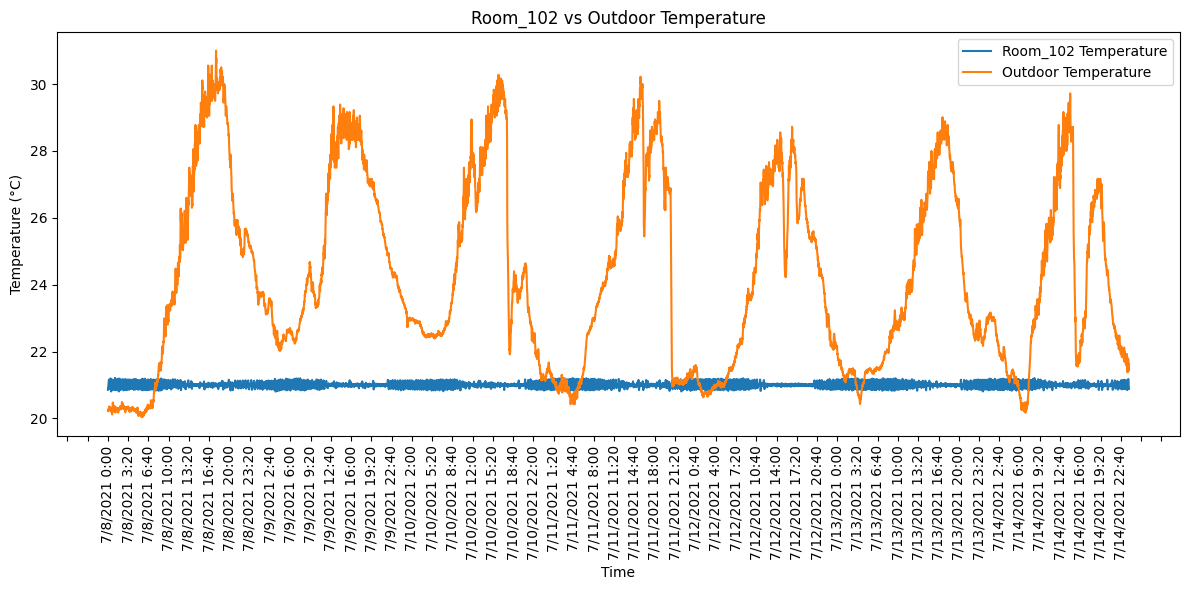

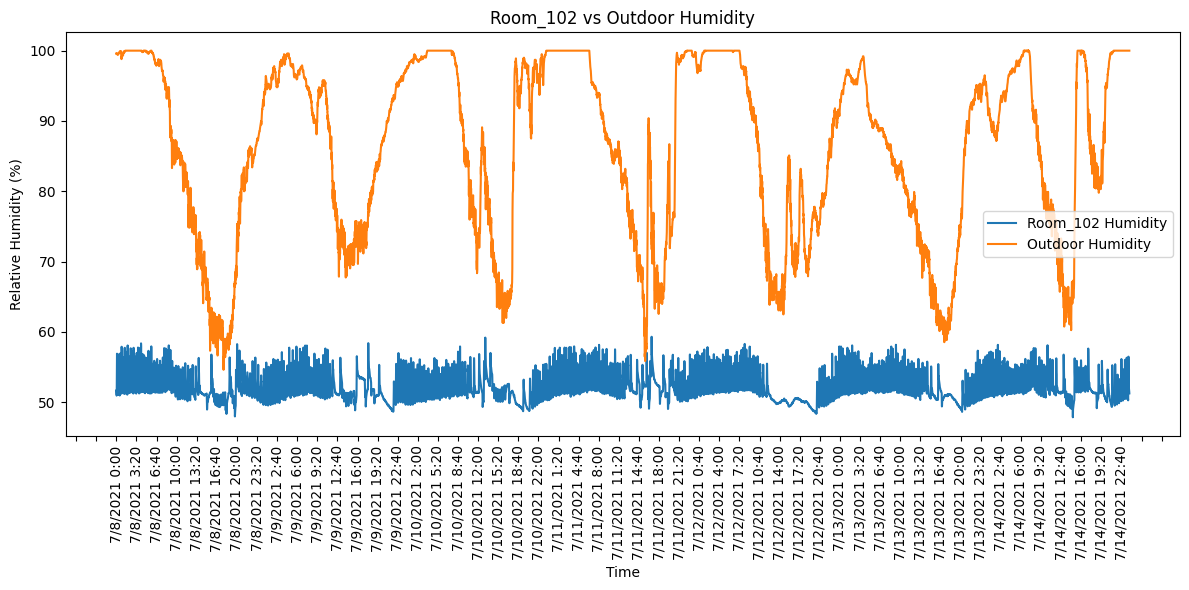

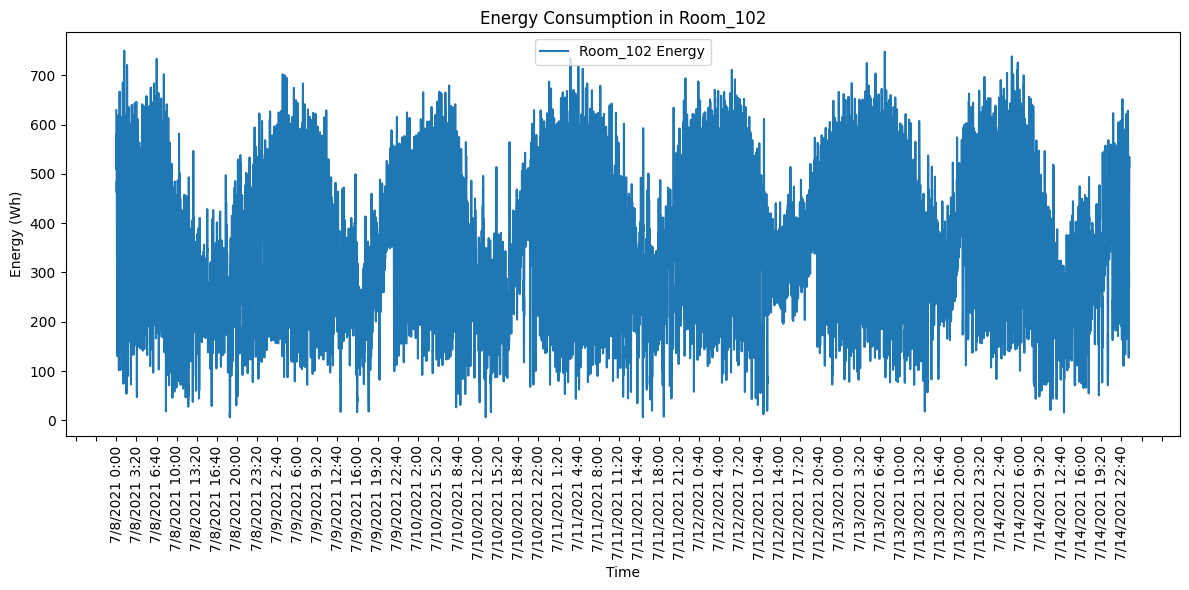

In [49]:

# Plot two temperatures (room and outdoor) in one graph
plt.figure(figsize=(12, 6))
plt.plot(room_data['TIMESTAMP'], room_data[f'T_{target_room}'], label=f'{target_room} Temperature')
plt.plot(weather_df['TIMESTAMP'], weather_df['T_out'], label='Outdoor Temperature')
plt.title(f'{target_room} vs Outdoor Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(60)) 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot two humidities (room and outdoor) in one graph
plt.figure(figsize=(12, 6))
plt.plot(room_data['TIMESTAMP'], room_data[f'RH_{target_room}'], label=f'{target_room} Humidity')
plt.plot(weather_df['TIMESTAMP'], weather_df['RH_out'], label='Outdoor Humidity')
plt.title(f'{target_room} vs Outdoor Humidity')
plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(60)) 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot energy of the room in another graph
energy_col = f'WH_RTU_VAV{target_room[-3:]}'
if energy_col in room_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(room_data['TIMESTAMP'], room_data[energy_col], label=f'{target_room} Energy')
    plt.title(f'Energy Consumption in {target_room}')
    plt.xlabel('Time')
    plt.ylabel('Energy (Wh)')
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(60)) 
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

,TIMESTAMP,HeatingLoad
0,7/8/2021 0:00,72.738246
1,7/8/2021 0:01,63.165567
2,7/8/2021 0:02,77.789832
3,7/8/2021 0:03,66.585289
4,7/8/2021 0:04,19.488730


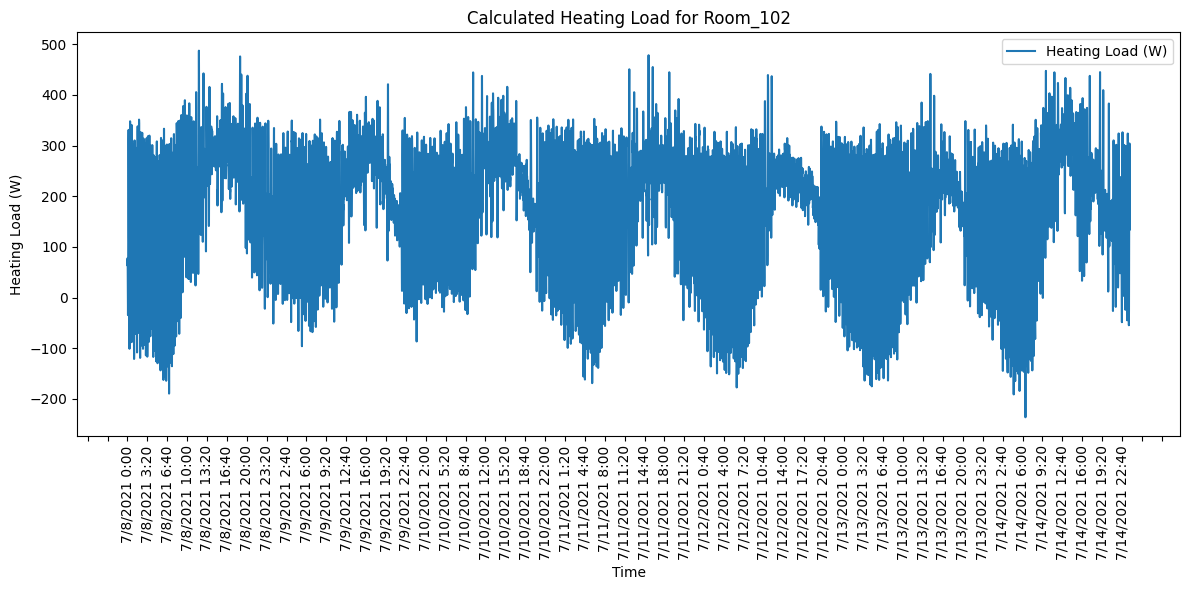

In [50]:
# Calculate heat load (in Watts) for each data point
# Q = m_dot * Cp * (T_supply - T_room)
# m_dot (kg/s) = AF_VAV_102 (m3/s) * air_density (kg/m3)
# Cp (J/kg.K) = 1005
# air_density (kg/m3) = 1.2

air_density = 1.2  # kg/m3
Cp = 1005  # J/kg.K
#
# Dynamically get supply temperature, room temperature, and airflow columns for the selected room
room_suffix = target_room[-3:]  # e.g., '103' from 'Room_103'
supply_temp_col = f'T_VAV_{room_suffix}'
room_temp_col = f'T_{target_room}'
af_col = f'AF_VAV_{room_suffix}'

if supply_temp_col in df.columns:
    T_supply = df[supply_temp_col]
else:
    T_supply = df['T_Sup_RTU']

T_room = room_data[room_temp_col]
AF = room_data[af_col]  # m3/s

m_dot = AF * air_density  # kg/s

# Heat load in Watts for each data point
heat_load = m_dot * Cp * (T_room-T_supply)

# Fix SettingWithCopyWarning by using .loc
room_data = room_data.copy()  # Ensure we're modifying a copy
room_data.loc[:, 'HeatingLoad'] = heat_load

# Display first 5 rows of heat load
display(room_data[['TIMESTAMP', 'HeatingLoad']].head())

# --- Plotting with better x-axis control ---
plt.figure(figsize=(12, 6))
plt.plot(room_data['TIMESTAMP'], room_data['HeatingLoad'], label='Heating Load (W)')
plt.title(f'Calculated Heating Load for {target_room}')
plt.xlabel('Time')
plt.ylabel('Heating Load (W)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(plt.MaxNLocator(60)) 
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Simulation

In [44]:

class RealisticHVACSimulator:
    def __init__(
        self,
        room_length=5.0,
        room_width=4.0,
        room_height=2.5,
        initial_temp=22.0,
        initial_humidity=50.0,
        outdoor_temp_profile=None,      # function of time or array
        outdoor_humidity=60.0,
        thermal_load_profile=None       # function of time or array
    ):
        self.room_length = room_length
        self.room_width = room_width
        self.room_height = room_height
        self.volume = room_length * room_width * room_height

        self.temperature = initial_temp
        self.humidity = initial_humidity

        self.outdoor_temp_profile = outdoor_temp_profile if outdoor_temp_profile else (lambda t: 30.0)
        self.outdoor_humidity = outdoor_humidity

        self.blower_speed = 0.0
        self.heating_coil = 0.0
        self.chiller = 0.0
        self.humidifier = 0.0
        self.dehumidifier = 0.0

        self.thermal_load_profile = thermal_load_profile if thermal_load_profile else (lambda t: 0.0)
        self.time = 0.0

    def step(self, blower_speed, heating_coil, chiller, humidifier, dehumidifier, dt=1.0):
        self.blower_speed = np.clip(blower_speed, 0, 1)
        self.heating_coil = np.clip(heating_coil, 0, 1)
        self.chiller = np.clip(chiller, 0, 1)
        self.humidifier = np.clip(humidifier, 0, 1)
        self.dehumidifier = np.clip(dehumidifier, 0, 1)

        air_mass = self.volume * 1.2

        heating_power = 5.0 * self.heating_coil
        cooling_power = 5.0 * self.chiller

        air_exchange = 0.1 + 0.4 * self.blower_speed
        air_exchange_per_dt = air_exchange * dt / 3600.0

        # Use profiles for outdoor temp and thermal load
        outdoor_temp = self.outdoor_temp_profile(self.time)
        thermal_load = self.thermal_load_profile(self.time)

        net_power = heating_power - cooling_power + thermal_load
        delta_temp = (net_power * 3600 * dt) / (air_mass * 1005)

        temp_leak = air_exchange_per_dt * (outdoor_temp - self.temperature)
        self.temperature += delta_temp + temp_leak

        humid_change = 2.0 * self.humidifier - 2.0 * self.dehumidifier
        humid_leak = air_exchange_per_dt * (self.outdoor_humidity - self.humidity)
        self.humidity += (humid_change * dt / 3600.0) + humid_leak

        self.temperature = np.clip(self.temperature, 10, 40)
        self.humidity = np.clip(self.humidity, 10, 90)

        self.time += dt

        return self.temperature, self.humidity

    def get_feedback(self):
        return {
            'temperature': self.temperature,
            'humidity': self.humidity,
            'blower_speed': self.blower_speed,
            'heating_coil': self.heating_coil,
            'chiller': self.chiller,
            'humidifier': self.humidifier,
            'dehumidifier': self.dehumidifier,
            'time': self.time
        }

# Example: create profiles from your dataframe
heating_load_series = df['HeatingLoad'].values
outdoor_temp_series = df['Tair_o'].values

# Define profile functions
def heating_load_profile(t):
    idx = int(t) if t < len(heating_load_series) else -1
    return heating_load_series[idx]

def outdoor_temp_profile(t):
    idx = int(t) if t < len(outdoor_temp_series) else -1
    return outdoor_temp_series[idx]

# Initialize simulator with profiles
sim = RealisticHVACSimulator(
    thermal_load_profile=heating_load_profile,
    outdoor_temp_profile=outdoor_temp_profile,
    initial_temp=df['Tair_ret'].iloc[0],
    initial_humidity=df['RHair_ret'].iloc[0]
)

KeyError: 'HeatingLoad'